In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import string

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [87]:
def escondeMensagemSecreta(capa):
    retornoCapa = []
    retornoMsg = []
    retornoMsgNp = []

    for i in capa:
        j = np.copy(i)

        randStr = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(j.shape[0]))
        randArr = [];

        for s in randStr:
            randArr.append(ord(s))

        randArr = np.array(randArr)
        j = np.vstack([j, randArr])
        retornoCapa.append(j)
        retornoMsg.append(randStr)
        retornoMsgNp.append(randArr)

    retornoCapa = np.array(retornoCapa)
    retornoMsgNp = np.array(retornoMsgNp)
    
    return retornoCapa, retornoMsg, retornoMsgNp

In [88]:
(x_train, _), (x_test, _) = mnist.load_data()

In [89]:
x_train_s, x_train_msg, x_train_msg_np = escondeMensagemSecreta(x_train)
x_test_s, x_test_msg, x_test_msg_np = escondeMensagemSecreta(x_test)

In [90]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [91]:
x_train_s = x_train_s.astype('float32') / 255.
x_test_s = x_test_s.astype('float32') / 255.

print (x_train_s.shape)
print (x_test_s.shape)

(60000, 29, 28)
(10000, 29, 28)


In [93]:
x_train_msg_np = x_train_msg_np.astype('float32') / 255.
x_test_msg_np = x_test_msg_np.astype('float32') / 255.

print (x_train_msg_np.shape)
print (x_test_msg_np.shape)

(60000, 28)
(10000, 28)


In [94]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [95]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [96]:
autoencoder.fit(x_train_s, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_s, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - val_loss: 0.0078
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

In [97]:
encoded_imgs = autoencoder.encoder(x_test_s).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

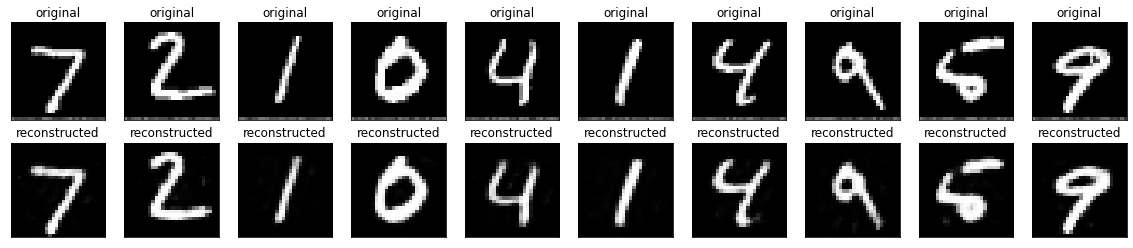

In [98]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_s[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [105]:
x_train_net_enc = autoencoder.encoder(x_train_s).numpy()
x_train_net = autoencoder.decoder(x_train_net_enc).numpy()

In [106]:
x_test_net_enc = autoencoder.encoder(x_test_s).numpy()
x_test_net = autoencoder.decoder(x_test_net_enc).numpy()

In [113]:
latent_dim = 64

class Autoencoder2(Model):
  def __init__(self, latent_dim):
    super(Autoencoder2, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(28, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder2 = Autoencoder2(latent_dim)

In [114]:
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [115]:
autoencoder2.fit(x_train_net, x_train_msg_np,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_net, x_test_msg_np))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.007

In [117]:
encoded_msgs = autoencoder2.encoder(x_test_net).numpy()
decoded_msgs = autoencoder2.decoder(encoded_msgs).numpy()

In [125]:
decoded_msgs_str = []

for i in decoded_msgs:
    j = np.copy(i)
    
    j *= 255.
    
    j = j.astype('int32')
    
    msgStr = ''
    
    for k in j:
        msgStr += chr(k)
    
    decoded_msgs_str.append(msgStr)

In [139]:
decoded_msgs_str[0]

'VTUUTUUUUTUUUTUUUVTVVUUUTUUU'

In [140]:
x_test_msg[0]

'kBICCVN14tziBA9JZyCa8sFRCALL'

In [144]:
MSE = ((decoded_msgs[0] - x_test_msg_np[0])**2).mean()
print(MSE)

0.0071858414


In [146]:
# Tentar usar Redes  Neurais Convolucionais
# Esconder imagens dentro de imagens